<a href="https://colab.research.google.com/github/janasamra/Face-Mask-Detection-Using-CNN/blob/main/DL_face_mask_detection_project_final_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Mask Detection using CNN

In [ ]:
#Import necessary librariesr
import numpy as np
import pandas as pd
import random
import os
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [ ]:
#reading dataframe
data = r"C:\Users\janas\OneDrive\Desktop\Big Data\data"

In [ ]:
#define the paths for the two classes
with_mask= os.path.join(data, r"C:\Users\janas\OneDrive\Desktop\Big Data\data\with_mask")
without_mask = os.path.join(data,r"C:\Users\janas\OneDrive\Desktop\Big Data\data\without_mask")

In [ ]:
#get a list containing the names of the entries in the directory given by path
with_mask_filenames = os.listdir(with_mask)
without_mask_filenames = os.listdir(without_mask)

#create dataframes containing image,paths and labels
with_mask_df = pd.DataFrame({'filename' : with_mask_filenames,
                             'label' : 1,
                             'path' : [os.path.join(with_mask, filename) for filename in with_mask_filenames]})

without_mask_df = pd.DataFrame({'filename' : without_mask_filenames,
                                'label' : 0,
                                'path' : [os.path.join(without_mask, filename) for filename in without_mask_filenames] })

In [ ]:
with_mask_df.head()

,filename,label,path
0,with_mask_1.jpg,1,C:\Users\janas\OneDrive\Desktop\Big Data\data\...
1,with_mask_10.jpg,1,C:\Users\janas\OneDrive\Desktop\Big Data\data\...
2,with_mask_100.jpg,1,C:\Users\janas\OneDrive\Desktop\Big Data\data\...
3,with_mask_1000.jpg,1,C:\Users\janas\OneDrive\Desktop\Big Data\data\...
4,with_mask_1001.jpg,1,C:\Users\janas\OneDrive\Desktop\Big Data\data\...


In [ ]:
without_mask_df.head()

,filename,label,path
0,without_mask_1.jpg,0,C:\Users\janas\OneDrive\Desktop\Big Data\data\...
1,without_mask_10.jpg,0,C:\Users\janas\OneDrive\Desktop\Big Data\data\...
2,without_mask_100.jpg,0,C:\Users\janas\OneDrive\Desktop\Big Data\data\...
3,without_mask_1000.jpg,0,C:\Users\janas\OneDrive\Desktop\Big Data\data\...
4,without_mask_1001.jpg,0,C:\Users\janas\OneDrive\Desktop\Big Data\data\...


In [ ]:
#combine the two dataframes
df = pd.concat([with_mask_df,without_mask_df], ignore_index=True)

#shuffle the dataframes
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df.head()

,filename,label,path
0,without_mask_2503.jpg,0,C:\Users\janas\OneDrive\Desktop\Big Data\data\...
1,with_mask_328.jpg,1,C:\Users\janas\OneDrive\Desktop\Big Data\data\...
2,without_mask_2412.jpg,0,C:\Users\janas\OneDrive\Desktop\Big Data\data\...
3,without_mask_3425.jpg,0,C:\Users\janas\OneDrive\Desktop\Big Data\data\...
4,without_mask_1759.jpg,0,C:\Users\janas\OneDrive\Desktop\Big Data\data\...


In [ ]:
# Split the data into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
# Print the number of samples in each set
print("Number of samples in training set: ", len(train_df))
print("Number of samples in validation set: ", len(val_df))

Number of samples in training set:  6042
Number of samples in validation set:  1511


In [ ]:
#define the image generator for performing data augmentation on data during training
train_datagen = ImageDataGenerator(
          rescale = 1./255,
          rotation_range = 40,
          width_shift_range = 0.4,
          height_shift_range = 0.4,
          shear_range = 0.2,
          zoom_range = 0.3,
          horizontal_flip = True,
          fill_mode = 'nearest'
)

batch_size = 64
target_size = (180,180) #(height,width)
train_df['label'] = train_df['label'].astype(str)
val_df['label'] = val_df['label'].astype(str)


#define the training set
train_data = train_datagen.flow_from_dataframe(
   dataframe=train_df,
    x_col='path',
    y_col='label',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    suset = 'training'
)

Found 6042 validated image filenames belonging to 2 classes.


In [ ]:
#define the generator without augmentation for the validation data
validation_datagen = ImageDataGenerator(rescale=1./255)
val_data = validation_datagen.flow_from_dataframe(
    val_df,
    x_col='path',
    y_col='label',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    suset = 'training'
)

Found 1511 validated image filenames belonging to 2 classes.


In [ ]:
ex_df = train_df.sample(n=1).reset_index(drop=True)
ex_data = train_datagen.flow_from_dataframe(
    ex_df,
    x_col='path',
    y_col='label',
    target_size=target_size,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


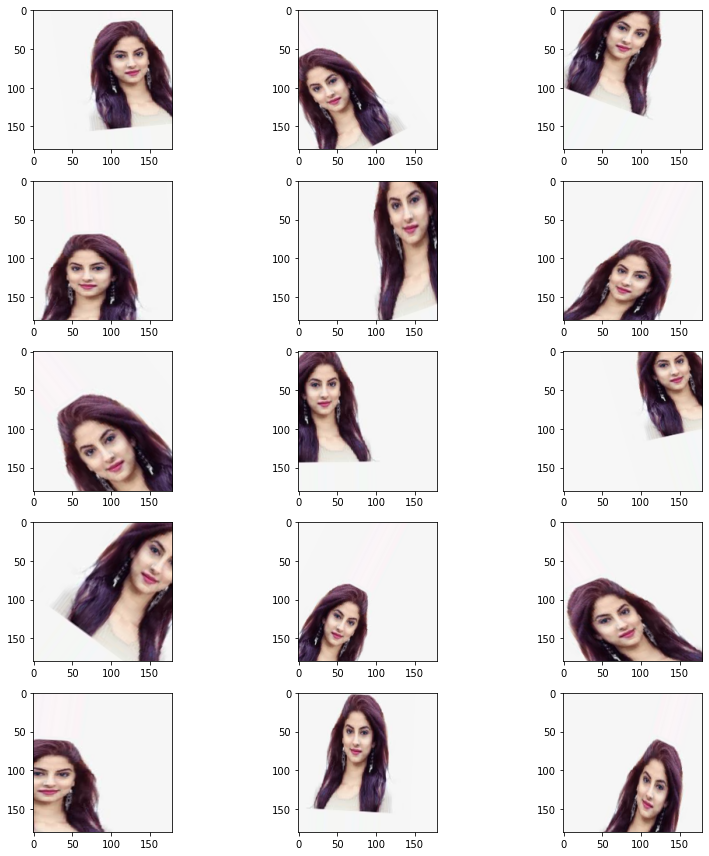

array([[1.]], dtype=float32)

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in ex_data:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()
Y_batch

In [ ]:
#label encoding
df["label"] = df["label"].replace({0: 'without_mask', 1: 'with_mask'})

In [ ]:
df

,filename,label,path
0,without_mask_2503.jpg,without_mask,C:\Users\janas\OneDrive\Desktop\Big Data\data\...
1,with_mask_328.jpg,with_mask,C:\Users\janas\OneDrive\Desktop\Big Data\data\...
2,without_mask_2412.jpg,without_mask,C:\Users\janas\OneDrive\Desktop\Big Data\data\...
3,without_mask_3425.jpg,without_mask,C:\Users\janas\OneDrive\Desktop\Big Data\data\...
4,without_mask_1759.jpg,without_mask,C:\Users\janas\OneDrive\Desktop\Big Data\data\...
...,...,...,...
7548,with_mask_1157.jpg,with_mask,C:\Users\janas\OneDrive\Desktop\Big Data\data\...
7549,with_mask_2429.jpg,with_mask,C:\Users\janas\OneDrive\Desktop\Big Data\data\...
7550,with_mask_2125.jpg,with_mask,C:\Users\janas\OneDrive\Desktop\Big Data\data\...
7551,with_mask_1766.jpg,with_mask,C:\Users\janas\OneDrive\Desktop\Big Data\data\...


<AxesSubplot:>

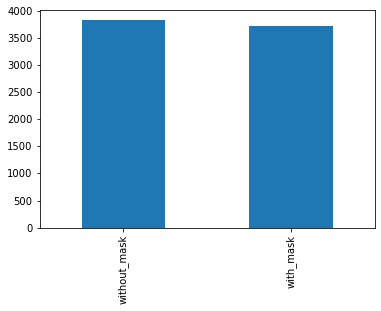

In [ ]:
df['label'].value_counts().plot.bar()

with_mask_2024.jpg


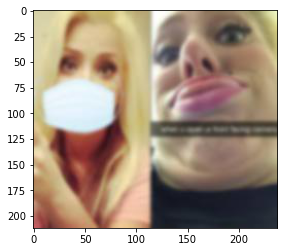

In [ ]:
from keras.utils import load_img

sample = random.choice(with_mask_filenames)
print(sample)
image = load_img(with_mask+ '/'+sample)
plt.imshow(image)

without_mask_1738.jpg


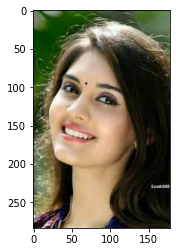

In [ ]:
from keras.utils import load_img

sample = random.choice(without_mask_filenames)
print(sample)
image = load_img(without_mask+ '/'+sample)
plt.imshow(image)

## Build Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation

model = Sequential() # creates a new sequential model object

# first conovolutional layer
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape=(180, 180, 3))) # add a 2D conovolutional layer
model.add(MaxPooling2D(pool_size =(2,2)))   # add a 2d max pool of size 2x2
model.add(Dropout(0.25))    # drop out ayer that drops randomly 25% of units in pre layer to avoid overfitting

# second conovlutional layer
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.25))

# third conovlutional layer
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.25))

model.add(Flatten()) # flatten the layer to 1D array
model.add(Dense(512, activation = 'relu')) # add a fully connected dense layer
model.add(Dropout(0.5))

model.add(Dense(2, activation = ('sigmoid'))) #we used sigmoid function because it's binary classification

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 89, 89, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 43, 43, 64)       

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=3)  # stop if validation loss doesn't improve for 3 epochs
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_data, epochs=10, validation_data=val_data,  callbacks=callbacks)

Epoch 1/10
95/95 [==============================] - 175s 2s/step - loss: 0.7814 - accuracy: 0.6637 - val_loss: 0.4770 - val_accuracy: 0.7756 - lr: 0.0010
Epoch 2/10
95/95 [==============================] - 153s 2s/step - loss: 0.5603 - accuracy: 0.7234 - val_loss: 0.4911 - val_accuracy: 0.7710 - lr: 0.0010
Epoch 3/10
95/95 [==============================] - 153s 2s/step - loss: 0.5316 - accuracy: 0.7519 - val_loss: 0.4161 - val_accuracy: 0.8319 - lr: 0.0010
Epoch 4/10
95/95 [==============================] - 161s 2s/step - loss: 0.5200 - accuracy: 0.7562 - val_loss: 0.5223 - val_accuracy: 0.7386 - lr: 0.0010
Epoch 5/10
95/95 [==============================] - 162s 2s/step - loss: 0.5144 - accuracy: 0.7590 - val_loss: 0.4185 - val_accuracy: 0.8564 - lr: 0.0010
Epoch 6/10
95/95 [==============================] - 155s 2s/step - loss: 0.4910 - accuracy: 0.7786 - val_loss: 0.3560 - val_accuracy: 0.8617 - lr: 0.0010
Epoch 7/10
95/95 [==============================] - 157s 2s/step - loss: 0.4

In [ ]:
# Evaluate the model on the val data
test_loss, test_acc = model.evaluate(val_data)

print('val accuracy:', test_acc, 'val loss:',test_loss)


24/24 [==============================] - 9s 364ms/step - loss: 0.3778 - accuracy: 0.8438
val accuracy: 0.8438120484352112 val loss: 0.3777633011341095


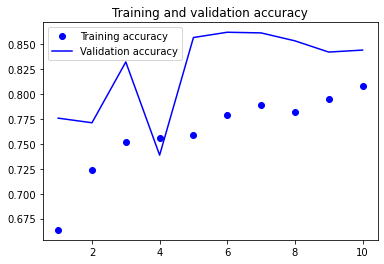

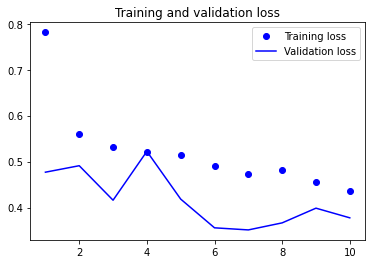

In [ ]:
# Plot the accuracy and loss curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# save the model
model.save_weights("model.h")

In [ ]:
# load test data
test_path = os.listdir(r"C:\Users\janas\OneDrive\Desktop\test data")
test_df = pd.DataFrame({
    'path': test_path
})
nb_samples = test_df.shape[0]

In [ ]:
#define the generator without augmentation for the test data
test_gen = ImageDataGenerator(rescale=1./255)
test_data = test_gen.flow_from_dataframe(
    test_df, r"C:\Users\janas\OneDrive\Desktop\test data" ,
    x_col='path',
    y_col=None,
    class_mode=None,
    target_size=target_size,
    batch_size=batch_size,
    shuffle=False
)

Found 87 validated image filenames.


In [ ]:
# predictions
predict = model.predict_generator(test_data, steps=np.ceil(nb_samples/batch_size))
predict

In [ ]:
pred_label=[] # empty list to store predicted labels
for row in predict:
    N=np.argmax(row) # find index of max value in the row or predicted outputs
    if N==1:
        pred_label.append('with mask')
    else:
        pred_label.append('without mask')
pd.DataFrame(pred_label,columns=['Prediction'])

,Prediction
0,with mask
1,without mask
2,without mask
3,without mask
4,without mask
...,...
82,with mask
83,with mask
84,with mask
85,with mask


<AxesSubplot:>

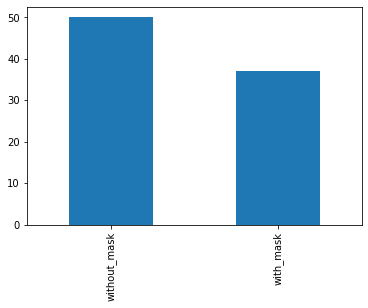

In [ ]:
#plot classes in test set
test_df['label'] = np.argmax(predict, axis=-1)
test_df['label'] = test_df['label'].replace({0: 'without_mask', 1: 'with_mask'})
test_df['label'].value_counts().plot.bar()

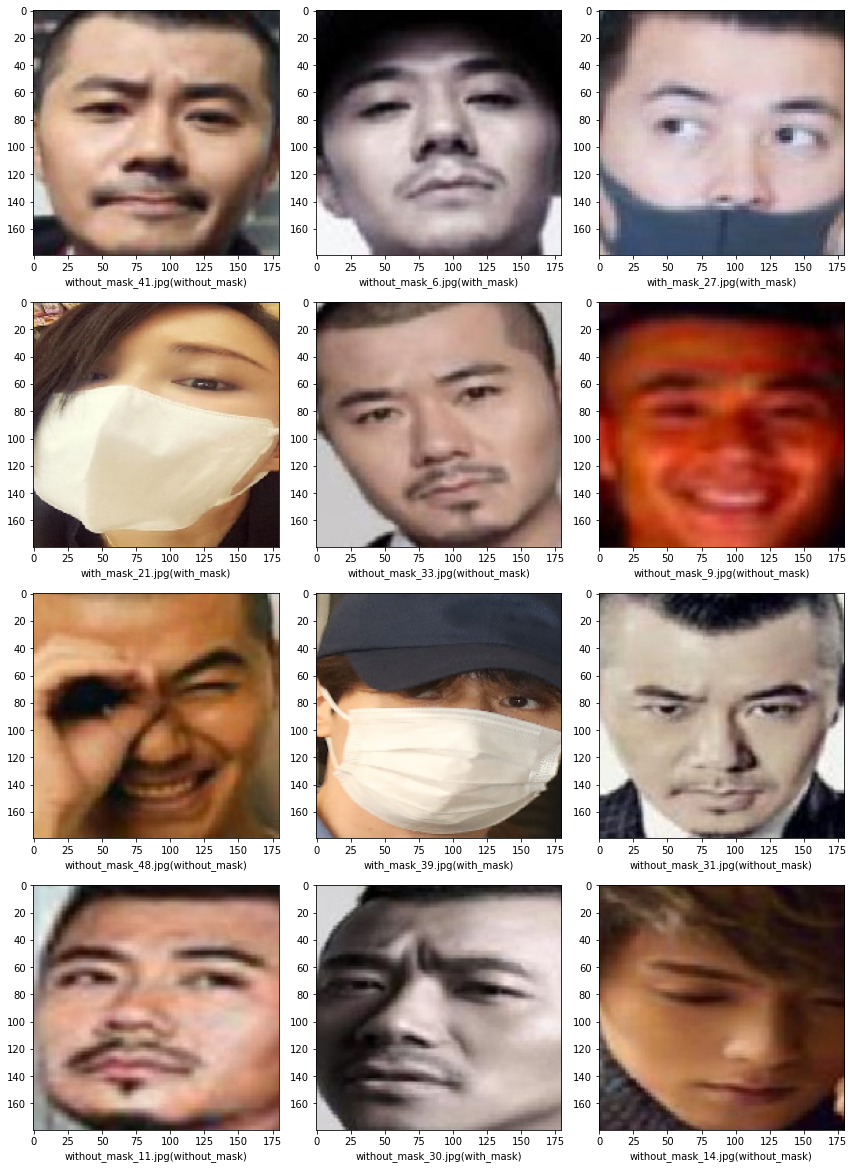

In [ ]:
#shuffle the dataframes
test_df = test_df.sample(frac=1).reset_index(drop=True)
# display images in test data and their corresponding predicted labels
sample_test = test_df.head(12)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    path = row['path']
    label = row['label']
    img = load_img(r"C:\Users\janas\OneDrive\Desktop\test data\\"+ path, target_size=target_size)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(path + '(' + "{}".format(label) + ')' )
plt.tight_layout()
plt.show()